In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
f_birth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Time Series Project /daily-total-female-births-CA_timeseries.csv",index_col = [0], parse_dates = [0])

In [14]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [15]:
type(f_birth)

pandas.core.frame.DataFrame

In [16]:
series_value = f_birth.values

In [17]:
series_value

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [19]:
type(series_value)         # we  need series to execute series data

numpy.ndarray

In [20]:
f_birth.size

365

In [21]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [22]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [23]:
import seaborn as sns

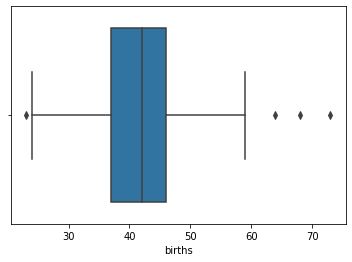

In [24]:
sns.boxplot(x=f_birth['births'])  # We can see out lier here so we need to balence data

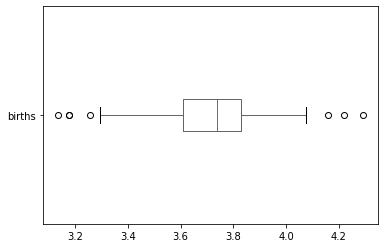

In [25]:
np.log(f_birth.births).plot(kind='box',vert=False)

In [26]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


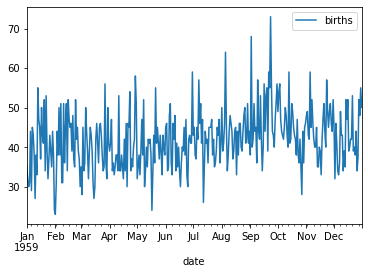

In [27]:
f_birth.plot() # We need to smoothing the series with the help of moving averages

In [30]:
f_birth_mean = f_birth.rolling(window = 30).mean()

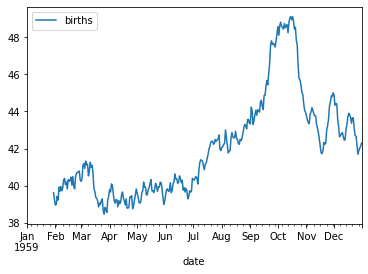

In [31]:
f_birth_mean.plot()

In [32]:
# Models in time series data
# 1. Base Line Model
# 2. Moving Average model
# 3. Autoregressiove
# 4. Exponential model
# 5. ARIMA
# 6. SARIMA

In [33]:
# We are going to create base line model
# Assumption : nex value will be Previous value, recent history is the best reflection of the future



In [36]:
value = pd.DataFrame(series_value)                     # need to convert series into dataframe first

In [38]:
birth_df = pd.concat([value, value.shift(1)], axis = 1)

In [39]:
birth_df.head()          # give headers to it

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [41]:
birth_df.columns = ['current_birth', 'Forecast_birth']

In [42]:
from sklearn.metrics import mean_squared_error

In [44]:
birth_error = mean_squared_error(birth_df.current_birth, birth_df.Forecast_birth)

ValueError: ignored

In [45]:
birth_test = birth_df[1: ]

In [47]:
birth_test.head()

,current_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [48]:
birth_error = mean_squared_error(birth_test.current_birth, birth_test.Forecast_birth)

In [49]:
birth_error

84.22252747252747

In [50]:
np.sqrt(birth_error)

9.177283229394606

In [51]:
# Create a Model
# ARIMA Model = Autoregressive Integrated(d) Moving Average (q)
# Time series should be stationary      

In [52]:
# Create a correlation chart
from statsmodels.graphics.tsaplots import  plot_acf,plot_pacf

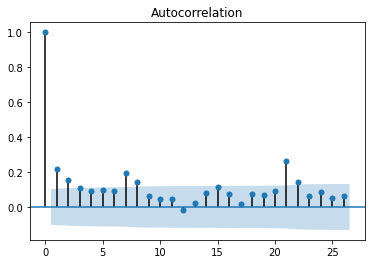

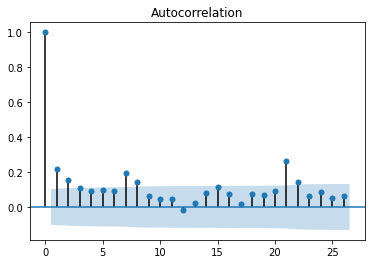

In [53]:
# plot_acf is to identify Q
#ARIMA(p,d,q)
plot_acf(f_birth)              # to identify the value of q

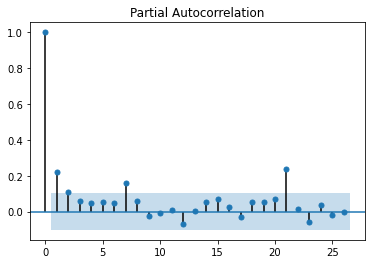

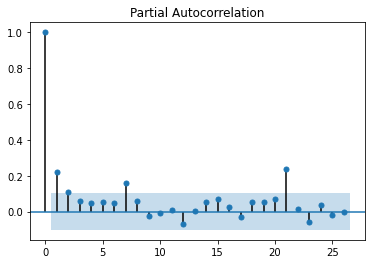

In [54]:
plot_pacf(f_birth)  # to identify the value of p

In [55]:
# Create a model
# p = 2,3            d = 0 , q = 3,4

f_birth.size

365

In [56]:
birth_train = f_birth[0:330]           #Split train and test data
birth_test = f_birth[330:365]

In [57]:
from statsmodels.tsa.arima_model import ARIMA

In [61]:
birth_model = ARIMA(birth_train, order = (2,1,3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [62]:
birth_model_fit = birth_model.fit()

In [63]:
birth_model_fit.aic # acaik information criteria saperate topic

2230.9482523572665

In [65]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0] # 0 contains forecast values

In [66]:
birth_forecast

array([45.30369833, 46.3106401 , 43.64945872, 44.59219668, 46.49706372,
       44.34348086, 44.08984412, 46.34390382, 45.07535206, 43.88105961,
       45.9521466 , 45.69576995, 43.97398079, 45.45674188, 46.10377395,
       44.31134533, 44.99233795, 46.26018937, 44.79345871, 44.66474437,
       46.18573149, 45.30637415, 44.5332346 , 45.94670787, 45.74844039,
       44.60565402, 45.63340441, 46.04985077, 44.84525522, 45.33695327,
       46.18219996, 45.1858708 , 45.12984484, 46.15767119, 45.55082443])

In [68]:
birth_test

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [ ]:
# Try to calculate error

In [69]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))                # 6.86 which is better than the accuracy we have received first which was 9.77

6.859975697276732